# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 17.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
44902,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0269,0,0,0,0
38485,0.0952,0.3833,1.0229,0.0122,0.0024,0.0562,1.1133,0.3076,3.9941,0.4688,6,6,5,5
381306,0.1953,0.0024,0.0024,0.0024,0.0024,0.0269,0.0659,0.0952,0.0024,0.0708,5,5,15,15
4124,0.0269,0.0903,0.0024,0.0024,0.0024,0.0024,0.3198,0.2100,0.0122,0.3394,5,0,1,0
243488,0.0415,0.0024,0.0024,0.0024,0.0024,0.0439,0.1929,0.2344,0.0024,0.3735,8,8,17,17


In [3]:
raw_data.shape

(473988, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473988 entries, 0 to 473987
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          473988 non-null  float64
 1   Emg2          473988 non-null  float64
 2   Emg3          473988 non-null  float64
 3   Emg4          473988 non-null  float64
 4   Emg5          473988 non-null  float64
 5   Emg6          473988 non-null  float64
 6   Emg7          473988 non-null  float64
 7   Emg8          473988 non-null  float64
 8   Emg9          473988 non-null  float64
 9   Emg10         473988 non-null  float64
 10  repetition    473988 non-null  int64  
 11  rerepetition  473988 non-null  int64  
 12  stimulus      473988 non-null  int64  
 13  restimulus    473988 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.6 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000
mean,0.237301,0.176670,0.174632,0.053067,0.016055,0.038061,0.259480,0.299283,0.189452,0.211255,3.135710,2.152799,5.556793,4.003823
std,0.385633,0.397342,0.506173,0.206251,0.073030,0.115458,0.551616,0.466489,0.547019,0.427989,3.481578,3.222700,6.570595,6.269613
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.046400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.114700,0.002400,0.002400,0.002400,0.002400,0.002400,0.061000,0.134300,0.002400,0.036600,2.000000,0.000000,3.000000,0.000000
75%,0.297900,0.127000,0.075700,0.002400,0.002400,0.022000,0.261200,0.341800,0.070800,0.227100,6.000000,4.000000,10.000000,7.000000
max,4.660600,4.660600,4.658200,4.658200,3.474100,2.683100,4.660600,4.663100,4.660600,4.658200,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     203806
4      15675
8      15627
7      15627
6      15619
5      15610
12     15602
2      15591
11     15575
9      15571
3      15546
10     15539
1      15500
14     10419
13     10416
17     10410
15     10370
16     10335
21      5221
18      5214
19      5206
23      5175
20      5174
22      5160
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

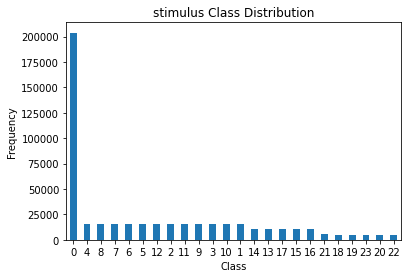

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
156235,0.0024,0.0024,0.0684,0.0024,0.0024,0.0024,0.0122,0.0122,0.2515,0.0024,0,0,0,0
24513,0.0928,0.0024,0.0024,0.0024,0.0024,0.0024,0.2051,0.1392,0.0024,0.1587,0,0,0,0
196114,0.3027,0.2124,0.0024,0.0024,0.0024,0.0024,0.0024,0.1001,0.0024,0.0024,0,0,0,0
205182,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0024,0.0024,0,0,0,0
80404,0.2881,0.1636,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.0098,0.0024,0,0,0,0


In [12]:
raw_data.shape

(387904, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387904 entries, 0 to 473987
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          387904 non-null  float64
 1   Emg2          387904 non-null  float64
 2   Emg3          387904 non-null  float64
 3   Emg4          387904 non-null  float64
 4   Emg5          387904 non-null  float64
 5   Emg6          387904 non-null  float64
 6   Emg7          387904 non-null  float64
 7   Emg8          387904 non-null  float64
 8   Emg9          387904 non-null  float64
 9   Emg10         387904 non-null  float64
 10  repetition    387904 non-null  int64  
 11  rerepetition  387904 non-null  int64  
 12  stimulus      387904 non-null  int64  
 13  restimulus    387904 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.4 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 86.25565537953881


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     40602
           1       0.80      0.82      0.81      1971
           2       0.79      0.78      0.79      1947
           3       0.77      0.76      0.77      2180
           4       0.80      0.80      0.80      2106
           5       0.79      0.79      0.79      1946
           6       0.82      0.81      0.82      1892
           7       0.75      0.76      0.76      1942
           8       0.79      0.79      0.79      2024
           9       0.76      0.74      0.75      2113
          10       0.75      0.76      0.76      1882
          11       0.75      0.76      0.76      2151
          12       0.73      0.73      0.73      2177
          13       0.74      0.70      0.72      1454
          14       0.71      0.72      0.71      1529
          15       0.76      0.78      0.77      1481
          16       0.70      0.71      0.71      1555
 

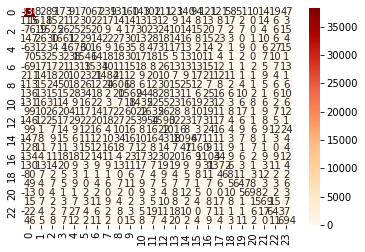

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.1019837331305344
MSE: 12.909771722457819
RMSE: 3.59301707795243


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8625017553392296
Recall Score :  0.8625565537953881
f1_score :  0.862498402845641


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 93.54738918034055


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     40602
           1       0.93      0.93      0.93      1971
           2       0.93      0.92      0.93      1947
           3       0.91      0.89      0.90      2180
           4       0.96      0.93      0.94      2106
           5       0.94      0.94      0.94      1946
           6       0.94      0.93      0.93      1892
           7       0.88      0.83      0.85      1942
           8       0.91      0.90      0.90      2024
           9       0.93      0.88      0.91      2113
          10       0.91      0.87      0.89      1882
          11       0.93      0.91      0.92      2151
          12       0.93      0.90      0.91      2177
          13       0.87      0.87      0.87      1454
          14       0.84      0.85      0.85      1529
          15       0.88      0.84      0.86      1481
          16       0.91      0.88      0.90      1555
 

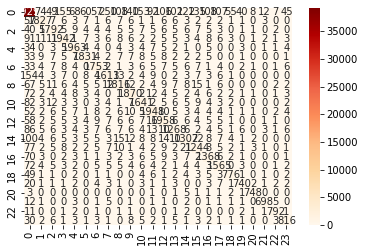

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.5809540995862389
MSE: 7.175996700222993
RMSE: 2.6788050881359387


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9351610324286229
Recall Score :  0.9354738918034055
f1_score :  0.9351930479389724


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 94.13258400897126


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     40602
           1       0.96      0.92      0.94      1971
           2       0.94      0.91      0.92      1947
           3       0.95      0.87      0.91      2180
           4       0.97      0.91      0.94      2106
           5       0.96      0.92      0.94      1946
           6       0.96      0.93      0.95      1892
           7       0.93      0.83      0.87      1942
           8       0.92      0.89      0.91      2024
           9       0.95      0.87      0.91      2113
          10       0.94      0.86      0.90      1882
          11       0.97      0.88      0.92      2151
          12       0.94      0.88      0.91      2177
          13       0.94      0.85      0.89      1454
          14       0.91      0.82      0.86      1529
          15       0.89      0.87      0.88      1481
          16       0.96      0.85      0.90      1555
 

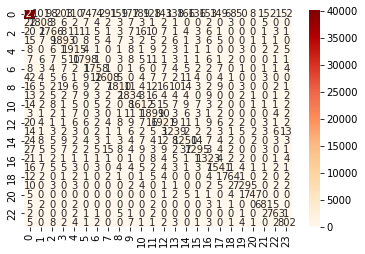

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.5178587540763847
MSE: 6.3655018625694435
RMSE: 2.5229946219858346


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9416120089939256
Recall Score :  0.9413258400897127
f1_score :  0.9404797307618223


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[23:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 93.06789033397352


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     40602
           1       0.93      0.90      0.92      1971
           2       0.90      0.90      0.90      1947
           3       0.92      0.87      0.89      2180
           4       0.94      0.90      0.92      2106
           5       0.93      0.92      0.92      1946
           6       0.94      0.91      0.92      1892
           7       0.90      0.83      0.86      1942
           8       0.90      0.88      0.89      2024
           9       0.92      0.85      0.88      2113
          10       0.89      0.84      0.86      1882
          11       0.93      0.86      0.89      2151
          12       0.90      0.86      0.88      2177
          13       0.91      0.84      0.87      1454
          14       0.85      0.82      0.84      1529
          15       0.87      0.86      0.87      1481
          16       0.89      0.84      0.87      1555
 

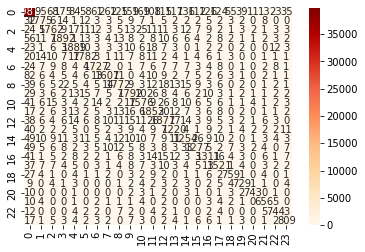

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.5823977520269138
MSE: 6.983320658408631
RMSE: 2.642597331870414


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9299895672397922
Recall Score :  0.9306789033397352
f1_score :  0.9299039241138858


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 94.5128317500419


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     40602
           1       0.97      0.91      0.94      1971
           2       0.95      0.92      0.94      1947
           3       0.97      0.87      0.92      2180
           4       0.98      0.92      0.95      2106
           5       0.96      0.94      0.95      1946
           6       0.97      0.93      0.95      1892
           7       0.94      0.82      0.88      1942
           8       0.94      0.90      0.92      2024
           9       0.97      0.88      0.92      2113
          10       0.96      0.87      0.91      1882
          11       0.97      0.90      0.93      2151
          12       0.95      0.89      0.92      2177
          13       0.95      0.86      0.90      1454
          14       0.93      0.84      0.88      1529
          15       0.91      0.87      0.89      1481
          16       0.96      0.86      0.91      1555
 

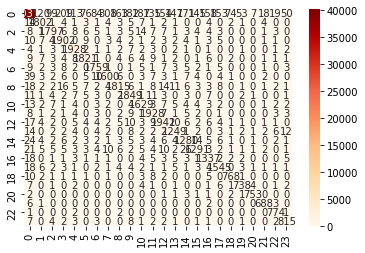

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.5005864838040242
MSE: 6.214794859566131
RMSE: 2.492949028673898


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9458731330514111
Recall Score :  0.9451283175004189
f1_score :  0.9443796521701348
